<a href="https://colab.research.google.com/github/Dr-Mamiz/Projects-Data-Analysis/blob/main/DATING_leads_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DATASET Advertiser_revenue**

In [ ]:
# Reading XL DATA in Python using Pandas - Exploring Option *XL/XLSX*
xl_file=pd.ExcelFile('/content/Sample data 25 - 28aug.xlsx')
Advertiser_revenue= xl_file.parse('Advertiser_revenue')
Advertiser_revenue.head(8)

,Conversion_id,Advertiser,Advertiser_id,date,device,geo,click_id,PI,Offer,payout,type,ConversionDate
0,932843,AD_PPL,15,2021-08-26,mobile,US,aa55e2115caa474a97a583e407daae37,7,Offer_h,1.06,PPL,2021-08-26
1,936735,AD_PPL,15,2021-08-27,mobile,US,d7923fa7110e4dc884877dc5ed6f1f87,7,Offer_h,1.06,PPL,2021-08-27
2,937216,AD_PPL,15,2021-08-27,mobile,US,57e5065325ad47fb93e8c24b495b4d06,7,Offer_h,1.06,PPL,2021-08-27
3,943871,AD_PPL,15,2021-08-28,mobile,US,28ff4b940425460e939c3775a2541d08,7,Offer_h,1.06,PPL,2021-08-28
4,943247,AD_PPL,15,2021-08-28,mobile,US,2ea4f0e02153469d84757275dc8b703d,7,Offer_h,1.06,PPL,2021-08-28
5,943196,AD_PPL,15,2021-08-28,mobile,US,59f2dcd181cd47c7a044948db6c60d61,7,Offer_h,1.06,PPL,2021-08-28
6,942485,AD_PPL,15,2021-08-28,mobile,US,6eea4ee691c4422986dc61dc059f6749,7,Offer_h,1.06,PPL,2021-08-28
7,941849,AD_PPL,15,2021-08-28,mobile,US,4e4ca4f8bf9d48e396aa5c8e2b20fc1e,7,Offer_h,1.06,PPL,2021-08-28


##Usually I copy the dataset as df, to have the the original one safe in case I need to reuse it



In [ ]:
# Copy of our dataset
xl_file= pd.read_excel('/content/Sample data 25 - 28aug.xlsx')
df=xl_file.copy()


In [ ]:
# Dataset SHAPE for Advertiser_revenue
Advertiser_revenue.shape

(23949, 12)

**Our dataset contains Advertiser_revenue contains 23949 rows and 12 columns.**



In [ ]:
# Basic information about our dataset Advertiser_revenue 
Advertiser_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23949 entries, 0 to 23948
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Conversion_id   23949 non-null  int64         
 1   Advertiser      23949 non-null  object        
 2   Advertiser_id   23949 non-null  int64         
 3   date            23949 non-null  datetime64[ns]
 4   device          23949 non-null  object        
 5   geo             23949 non-null  object        
 6   click_id        23944 non-null  object        
 7   PI              23949 non-null  object        
 8   Offer           23949 non-null  object        
 9   payout          23949 non-null  float64       
 10  type            23949 non-null  object        
 11  ConversionDate  23949 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 2.2+ MB


In [ ]:
# Checking if we have any weird values
Advertiser_revenue.describe()

,Advertiser_id,payout
count,23949.000000,23949.000000
mean,28.161719,0.827878
std,18.870964,1.555221
min,6.000000,-75.000000
25%,11.000000,0.230000
50%,20.000000,0.750000
75%,50.000000,1.270000
max,51.000000,100.020000


Perfect :)

In [ ]:
# Since I don't need the columns 'Conversion_id' & 'click_id' & 'ConversionDate' so I'll delete them from our dataset
del Advertiser_revenue['ConversionDate']
del Advertiser_revenue['click_id']
del Advertiser_revenue['Conversion_id']

Advertiser_revenue.head(3)

,Advertiser,Advertiser_id,date,device,geo,PI,Offer,payout,type
0,AD_PPL,15,2021-08-26,mobile,US,7,Offer_h,1.06,PPL
1,AD_PPL,15,2021-08-27,mobile,US,7,Offer_h,1.06,PPL
2,AD_PPL,15,2021-08-27,mobile,US,7,Offer_h,1.06,PPL


In [ ]:
# Number of Advertisers by category for the dates: 25th ,26th ,27th ,28th of August
Advertiser_revenue.groupby(['Advertiser'])['date'].count()

Advertiser
AD_PPL           257
AFF_PPL          263
AF_PPL            14
CL_PPL           606
CPC_PPC         7631
CUM_PPS            1
IMA_CH_PPS        90
IMA_DACH_PPS       2
IMA_ES_PPS       173
RED_PPL         2684
RO_PPL          2979
TDN_PPL          729
TM2_PPL          832
TN2_PPL          780
TOG_PPL         3680
TOG_PPS          801
TP_PPL          2415
XCA_PPL           12
Name: date, dtype: int64


##Number of Advertisers by category for the dates: 25th ,26th ,27th ,28th of August
AD_PPL           257


AFF_PPL          263


AF_PPL            14


CL_PPL           606


CPC_PPC         7631


CUM_PPS            1


IMA_CH_PPS        90


IMA_DACH_PPS       2


IMA_ES_PPS       173


RED_PPL         2684


RO_PPL          2979


TDN_PPL          729


TM2_PPL          832


TN2_PPL          780


TOG_PPL         3680


TOG_PPS          801


TP_PPL          2415


XCA_PPL           12

In [ ]:
Advertiser_revenue.geo.unique()

array(['US', 'BE', 'DE', 'CA', 'AU', 'UK', 'NZ', 'IT', 'FR', 'AT', 'CH',
       'IE', 'NL', 'ES'], dtype=object)

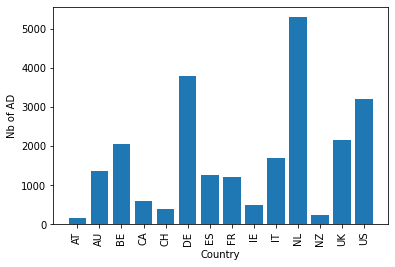

In [ ]:

# visualization (diagram) Number of Advertisers by Countries
plt.bar(Advertiser_revenue.groupby ('geo')['Advertiser'].count().index,df.groupby ('geo')['Advertiser'].count().values)
plt.xticks(rotation='vertical')
plt.xlabel ('Country')
plt.ylabel ('Nb of AD')
plt.show()

##As we can see from the diagram, NL is our best client and the next best are  DE & US.

PS:We need to develop our market more in: AT, CA, IE, NZ and CH (to be market oriented)

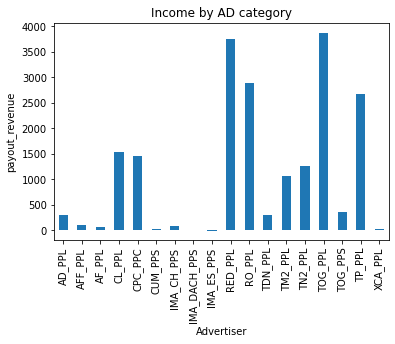

In [ ]:
# Income by AD category

Advertiser_revenue.groupby(['Advertiser'])['payout'].sum().plot(kind='bar')
plt.title('Income by AD category')
plt.xlabel('Advertiser')
plt.ylabel('payout_revenue')
plt.show()

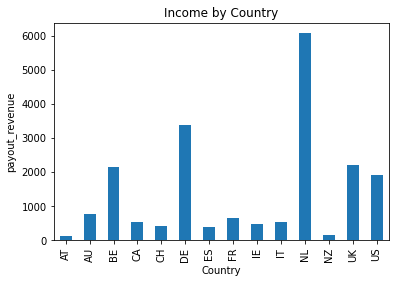

In [ ]:
# Income by Country

Advertiser_revenue.groupby(['geo'])['payout'].sum().plot(kind='bar')
plt.title('Income by Country')
plt.xlabel('Country')
plt.ylabel('payout_revenue')
plt.show()

##The highest incomes are from:

.  1st postion: NL

.  2nd position: DE

.  3rd position: UK and BE

.  4th position: USA

*PS: I believe that we need to make more sales to: CA, FR,ES,IT,CH*

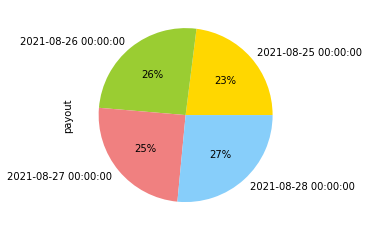

In [ ]:
## Visualisation: PIE representing the % of mean Payout_Income per day

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
Advertiser_revenue.groupby(['date'])['payout'].mean().plot.pie(autopct='%0.f%%',colors = colors)

##We are selling almost the same quantity of traffic during all days of the week. However, on the 28th *Saturday* a bit more due to the fact that it's a day off (weekend). 

# **DATASET payout_to_partners**

In [ ]:
xl_file=pd.ExcelFile('/content/Sample data 25 - 28aug.xlsx')
payout_to_partners= xl_file.parse('payout_to_partners')
payout_to_partners.head(8)

,PI,Advertiser_id,offer_name,country,click_date,Payout,transaction_id,type,conversion_status,Date.1
0,77,9,Offer_b,Italy,8/27/2021 7:39:42 PM,1.65,e7c43602d0ec42978f0ce16b84302b04,CV,approved,2021-08-27
1,103,9,Offer_b,Spain,8/28/2021 10:11:23 AM,0.55,3fa2fd5bc9c4406a8576df0b20455835,CV,approved,2021-08-28
2,2,9,Offer_b,Netherlands,8/28/2021 7:04:16 PM,5.59,710c77437a9b45e498164f20d987f6f9,CV,approved,2021-08-28
3,445,9,Offer_b,Italy,8/25/2021 12:02:26 AM,1.65,9b159f8bcbb74b44b38510d6468d30fb,CV,approved,2021-08-25
4,559,9,Offer_b,Italy,8/25/2021 2:00:00 AM,1.65,19b0e887451b4a5c86f23e97cc0cd397,CV,approved,2021-08-25
5,149,9,Offer_b,Belgium,8/25/2021 4:04:50 PM,4.75,7785729c5d0242188b0ad0bd6b0b3afc,CV,approved,2021-08-25
6,152,9,Offer_b,Netherlands,8/26/2021 12:12:57 PM,5.25,42e89ccdf86e412a858ac4efdfa38c0f,CV,approved,2021-08-26
7,152,9,Offer_b,Netherlands,8/26/2021 12:40:06 PM,4.75,72d3312bd4954ed999995676ee6cd1ba,CV,approved,2021-08-26


In [ ]:
# Dataset SHAPE for payout_to_partners
payout_to_partners.shape

(4648, 10)

In [ ]:
# Since I don't need the columns 'conversion_status' & 'transaction_id' & 'click_date' so I'll delete them from our dataset
del payout_to_partners['conversion_status']
del payout_to_partners['transaction_id']
del payout_to_partners['click_date']

In [ ]:
payout_to_partners.head(2)

,PI,Advertiser_id,offer_name,country,Payout,type,Date.1
0,77,9,Offer_b,Italy,1.65,CV,2021-08-27
1,103,9,Offer_b,Spain,0.55,CV,2021-08-28


[Text(0, 0, 'Australia'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Ireland'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'New Zealand'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'United States')]

<Figure size 2880x1728 with 0 Axes>

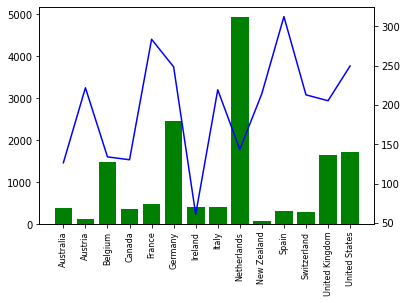

In [ ]:
 Products=payout_to_partners.groupby('country')['Payout'].sum().index
Quantity=payout_to_partners.groupby('country')['Payout'].sum()
Prices=payout_to_partners.groupby('country')['PI'].mean()
plt.figure(figsize=(40,24))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(Products,Quantity, color='g')
ax2.plot(Products,Prices,'b-')
ax1.set_xticklabels(Products,rotation='vertical',size=8)

In [ ]:
payout_to_partners.dtypes

payout_to_partners['Payout']=payout_to_partners['Payout'].astype(float)


**In this section we'll compare the numbers of offers by categories between the dataset Advertiser_revenue and payout_to_partners.**

**Remark: the shape of our dataset Advertiser_revenue   (23949 rows) in comparison to the dataset payout_to_partners (4648 rows) which can effect the result (comparison)**

In [ ]:
payout_to_partners['offer_name'].value_counts()

Offer_b     1050
Offer_o      775
Offer_c      767
Offer_f      761
Offer_a1     340
Offer_b1     280
Offer_z      253
Offer_c1     118
Offer_h       78
Offer_k       74
Offer_a       64
Offer_p       29
Offer_y       23
Offer_g       14
Offer_t       12
Offer_x       10
Name: offer_name, dtype: int64

In [ ]:
Advertiser_revenue['Offer'].value_counts()

Offer_a1    7631
Offer_c     3680
Offer_o     2979
Offer_b     2684
Offer_f     2415
Offer_z      832
Offer_a      801
Offer_c1     780
Offer_k      729
Offer_b1     606
Offer_y      263
Offer_h      257
Offer_p      173
Offer_x       90
Offer_g       14
Offer_t       12
0              2
Offer_l        1
Name: Offer, dtype: int64

In this section we'll calculate the margin  *benifits*  from 25.08 to 28.08

In [ ]:
TOTAL_REVENUE_Advertiser = sum(Advertiser_revenue.payout)
print(f"The Total revenue_Advertiser is: {TOTAL_REVENUE_Advertiser} EURO")

ROTAL_PAYOUT_to_partners = sum(payout_to_partners.Payout)
print(f"The Total PAYOUT_to_partners is: {ROTAL_PAYOUT_to_partners} EURO")

print (f"The Margine is:{19826.84 - 15074.41} EURO")


The Total revenue_Advertiser is: 19826.840000001277 EURO
The Total PAYOUT_to_partners is: 15074.409999999758 EURO
The Margine is:4752.43 EURO


Let's take a look about the devices that were used for opening the Ad (Traffic) 

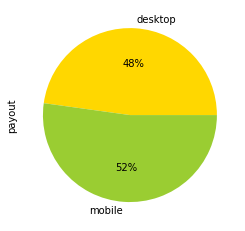

In [ ]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red','white','purple']
df.groupby(['device'])['payout'].mean().plot.pie(autopct='%0.f%%',colors = colors)

Mobile devices are used *4%*  more than Desktop.